#Data Analysis
After collecting the data from retailers websites, we are going to explore it and have a close idea about it.

In [111]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns 

In [112]:
df = pd.read_csv('preprocessed_dataset.csv')

In [113]:
df.head()

,Product,Price,category,Filename,Retailer
0,NAFNAF Blue Cotton-blend skinny pants,3.0,pants,drest.csv,drest
1,Black puff sleeve denim blouse dress,3.0,dresses,drest.csv,drest
2,NAFNAF Handbag mauve,3.0,accessories,drest.csv,drest
3,NAFNAF FLUID T-SHIRT WITH LACE TRIM,3.0,t-shirts,drest.csv,drest
4,RIVER ISLAND -Brown spot cropped blazer,3.0,blazers,drest.csv,drest


We are going to see how many articles we have for each category.

In [114]:
df['category'].value_counts()

dresses        218
pants          216
accessories    205
t-shirts       171
blazers        166
shoes          145
sweatshirts     27
perfumes        16
Name: category, dtype: int64

Now, our goal is to make a bar plot in which we represent each category with the number of articles we have.

In [115]:
list_categories=[]
list_counts=[]

In [116]:
for idx,name in enumerate(df['category'].value_counts().index.tolist()):
  list_categories.append(name)
  list_counts.append(df['category'].value_counts()[idx])

In [117]:
list_categories

['dresses',
 'pants',
 'accessories',
 't-shirts',
 'blazers',
 'shoes',
 'sweatshirts',
 'perfumes']

In [118]:
list_counts

[218, 216, 205, 171, 166, 145, 27, 16]

In [119]:
list_categories.reverse()


In [120]:
list_counts.reverse()

In [121]:
plt.style.use('seaborn')

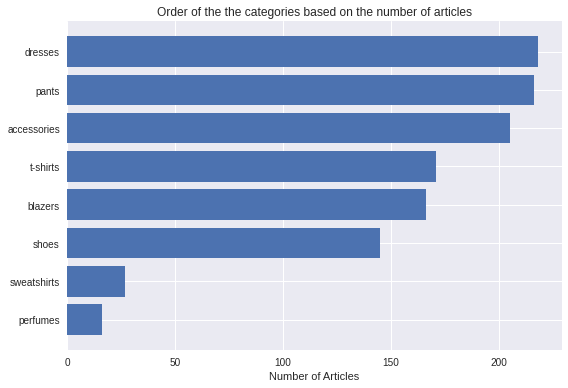

In [122]:
plt.barh(list_categories,list_counts)
plt.title("Order of the the categories based on the number of articles")
plt.xlabel("Number of Articles")
#plt.ylabel("Number of programmers")

plt.tight_layout()
plt.show()

So, through this Bar plot we understand that the most articles we have are dresses. They are over 218 articles. Then, we have pants with 216 and accessories with 205.
The least elements we have are the perfumes and sweatshirts.We have 27 sweatshirts and 16 perfumes.

Now let's represent the most common categories in our data using a pie chart.

In [123]:
list_categories.reverse()
list_counts.reverse()



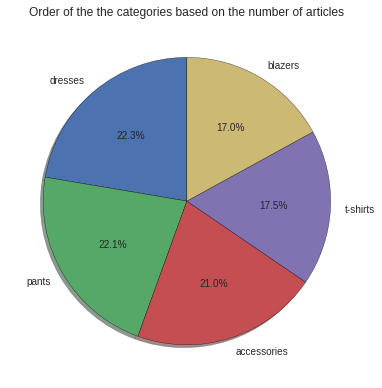

In [124]:
labels=list_categories[:5]
slices=list_counts[:5]
plt.pie(slices, labels=labels, shadow= True,autopct='%1.1f%%',startangle=90,  wedgeprops={'edgecolor':'black'})

plt.title("Order of the the categories based on the number of articles")
plt.tight_layout()
plt.show()

These 5 categories are close in percentage. 

Now, our goal is to see in which category we have the cheapest article and in which category we have the most expensive article. Then, we are going to make the comparison based on the mean Price.

In [125]:
new_df=df[['Price','category']]

In [126]:
df_mean=new_df.groupby(['category'], as_index=False).mean()
#df_mean is the dataframe containing the mean price for each category.

In [127]:
df_mean.head()

,category,Price
0,accessories,77.374878
1,blazers,239.762530
2,dresses,147.274312
3,pants,122.433704
4,perfumes,77.675000


In [128]:
df_mean.rename(columns={"Price": "Mean"}, inplace=True)

In [129]:
df_min=new_df.groupby(['category'], as_index=False).min()
#df_min is the dataframe containing the minimum price for each category

In [130]:
df_min.head()

,category,Price
0,accessories,3.0
1,blazers,3.0
2,dresses,3.0
3,pants,3.0
4,perfumes,25.9


In [131]:
df_min.rename(columns={"Price": "Min"}, inplace=True)

In [132]:
df_max=new_df.groupby(['category'], as_index=False).max()
#df_max is the dataframe containing the maximum price for each category.

In [133]:
df_max.head()

,category,Price
0,accessories,1144.9
1,blazers,1144.9
2,dresses,1144.9
3,pants,1144.9
4,perfumes,139.0


In [134]:
df_max.rename(columns={"Price": "Max"}, inplace=True)

In [135]:
df_min.drop(columns=['category'],inplace=True)
df_max.drop(columns=['category'],inplace=True)

In [136]:
s1 = df_min.squeeze()
s2 = df_max.squeeze()

* df_mean is the dataframe containing the mean price for each category.
* df_min is the dataframe containing the minimum price for each category. 
* df_max is the dataframe containing the maximum price for each category.

Now, we're going to combine these dataframes 

In [137]:
df1 = pd.concat([df_mean, s1], axis=1)
df_prices = pd.concat([df1, s2], axis=1)

In [138]:
df_prices.head()

,category,Mean,Min,Max
0,accessories,77.374878,3.0,1144.9
1,blazers,239.762530,3.0,1144.9
2,dresses,147.274312,3.0,1144.9
3,pants,122.433704,3.0,1144.9
4,perfumes,77.675000,25.9,139.0


In [139]:
df_prices.sort_values(by='Mean',inplace= True)

In [140]:
df_prices

,category,Mean,Min,Max
7,t-shirts,69.541988,3.0,1144.9
0,accessories,77.374878,3.0,1144.9
4,perfumes,77.675000,25.9,139.0
6,sweatshirts,107.481481,79.9,139.0
3,pants,122.433704,3.0,1144.9
5,shoes,122.668828,3.0,1144.9
2,dresses,147.274312,3.0,1144.9
1,blazers,239.762530,3.0,1144.9


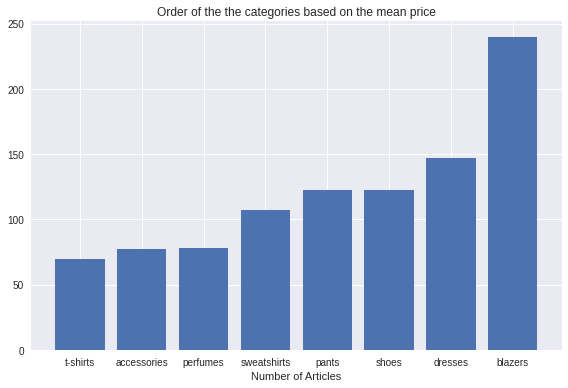

In [141]:
plt.bar(df_prices['category'],df_prices['Mean'])
plt.title("Order of the the categories based on the mean price")
plt.xlabel("Number of Articles")
#plt.ylabel("Number of programmers")

plt.tight_layout()
plt.show()

Through this bar plot, we conclude that the highest mean price is corresponding to the category blazers. Where the t-shirts is the category that have the least expensive prices.

Now, our goal is to see which retailer sell the cheapest article and in which one have the most expensive article. Then, we are going to make the comparison between retailers based on the mean Price.

In [142]:
df.sort_values(by='Retailer',inplace= True)

In [143]:
df_retail= df[['Retailer','Price']]

In [144]:
df_retail.head()

,Retailer,Price
339,HA,69.99
110,HA,39.99
105,HA,35.99
104,HA,35.99
102,HA,35.99


In [145]:
df2_mean=df_retail.groupby(['Retailer'], as_index=False).mean()
#df2_mean is the dataframe containing the mean price for each retailer.

In [146]:
df2_mean.head()

,Retailer,Price
0,HA,49.256667
1,drest,151.451657
2,mango,140.426065
3,shana,63.780850
4,zara,128.778947


In [147]:
df2_mean.rename(columns={"Price": "Mean"}, inplace=True)

In [150]:
df2_min=df_retail.groupby(['Retailer'], as_index=False).min()
#df2_min is the dataframe containing the minimum price for each retailer.

In [151]:
df2_min.head()

,Retailer,Price
0,HA,15.99
1,drest,3.00
2,mango,35.90
3,shana,15.99
4,zara,19.90


In [152]:
df2_min.rename(columns={"Price": "Min"}, inplace=True)

In [153]:
df2_max=df_retail.groupby(['Retailer'], as_index=False).max()
#df2_max is the dataframe containing the max price for each retailer.

In [154]:
df2_max.head()

,Retailer,Price
0,HA,99.99
1,drest,1144.90
2,mango,469.00
3,shana,199.99
4,zara,369.00


In [155]:
df2_max.rename(columns={"Price": "Max"}, inplace=True)

In [156]:
df2_min.drop(columns=['Retailer'],inplace=True)
df2_max.drop(columns=['Retailer'],inplace=True)
s1 = df2_min.squeeze()
s2 = df2_max.squeeze()

* df2_mean is the dataframe containing the mean price for each retailer.
* df2_min is the dataframe containing the minimum price for each retailer. 
* df2_max is the dataframe containing the maximum price for each retailer.

Now, we're going to combine these dataframes 

In [157]:
df1 = pd.concat([df2_mean, s1], axis=1)
df_prices_retail = pd.concat([df1, s2], axis=1)

In [158]:
df_prices_retail.head()

,Retailer,Mean,Min,Max
0,HA,49.256667,15.99,99.99
1,drest,151.451657,3.00,1144.90
2,mango,140.426065,35.90,469.00
3,shana,63.780850,15.99,199.99
4,zara,128.778947,19.90,369.00


In [159]:
df_prices_retail.sort_values(by='Mean',inplace= True)

In [160]:
df_prices_retail

,Retailer,Mean,Min,Max
0,HA,49.256667,15.99,99.99
3,shana,63.780850,15.99,199.99
4,zara,128.778947,19.90,369.00
2,mango,140.426065,35.90,469.00
1,drest,151.451657,3.00,1144.90


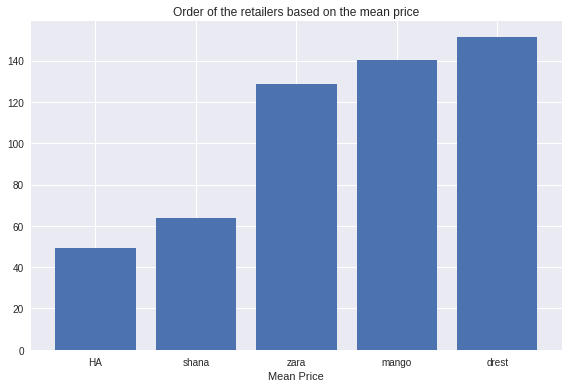

In [161]:
plt.bar(df_prices_retail['Retailer'],df_prices_retail['Mean'])
plt.title("Order of the retailers based on the mean price")
plt.xlabel("Mean Price")
#plt.ylabel("Number of programmers")

plt.tight_layout()
plt.show()

Through this bar plot, we conclude that the highest mean price is corresponding to the retailer 'drest'.And the retailer that have the least expensive prices is 'HA'